In [1]:
import glob
import spectral
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import pandas 
import os
import pandas as pd
import glob
import numpy as np

### 测试用例

In [2]:
from LineSweep import get_spectral_split , read_hsi , read_roi , get_spectral_Threshold

d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


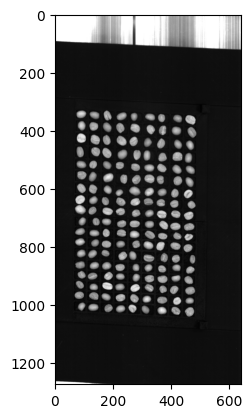

In [ ]:
files = glob.glob(rf'G:\咖啡豆0702\*\quangguangpu\*_ref.hdr')
msi = read_hsi(files[0])
plt.imshow(msi[:,:,155], cmap='gray')

In [5]:
files_mask = glob.glob(r'G:\咖啡豆0702\Moldy\*.txt')
files_roi = [file for file in files_mask if 'classes.txt' not in file ] 
rois = read_roi(files_roi[0]) #输入标注文件地址，读取ROI,为【labels , x , y  ,w  h 】 的格式，xy为左上角坐标，wh为宽和高，都是小数形式
print(rois)


[['0', 0.08281250000000001, 0.2268445, 0.234375, 0.591837], ['0', 0.3187495, 0.225275, 0.457813, 0.601256]]


### get_spectral_split 网格切分测试用例

(np.float64(-0.5), np.float64(639.5), np.float64(963.5), np.float64(-0.5))

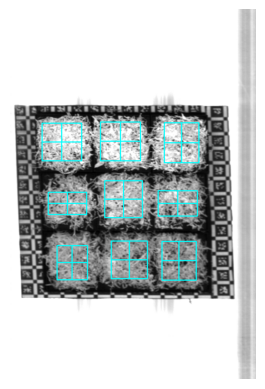

In [5]:
spectrum , labels = get_spectral_split( rois , msi ,True , rows =2 , columns= 2 )
plt.axis('off')

###  get_spectral_Threshold阈值分割测试用例

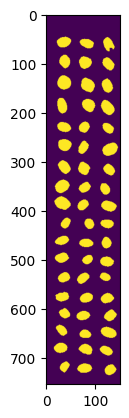

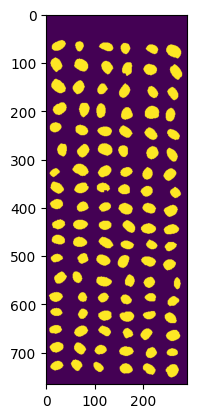

In [6]:
spectrum, labels = get_spectral_Threshold( rois , msi  , show_roi = True)

### 批量运行


In [ ]:
import glob
import numpy as np
from tqdm import tqdm  # Import tqdm for progress bar
import matplotlib.pyplot as plt

# import importlib
# importlib.reload(LineSweep)
from LineSweep import get_spectral_split , read_hsi , read_roi , get_reflect_line_sweep

# File paths
files = glob.glob(rf'G:\咖啡豆0702\*\*\*_ref.hdr')
files_mask = glob.glob(rf'G:\咖啡豆0702\mark\*.txt')

files_roi = [file for file in files_mask if 'classes.txt' not in file]
rows=2
columns=2

spectrum_data = []
labels = []

# Use tqdm to create a progress bar for the loop
for i in tqdm(range(len(files_roi)), desc="Processing Files"):
# for i in tqdm(range(2), desc="Processing Files"):
    rois = read_roi(files_roi[i])  # 输出对应图像的ROI， 格式是【【labels，x , y , w  ,h】】
    
    # msi = read_hsi(files[i])  # 输出对应的高光谱图像

    #索引到ROI文件对应的图像，名字能一一对应
    msi_name = [flie for flie in files if os.path.basename(files_roi[i]).split('.')[0] in flie][0]
    msi = read_hsi(msi_name)

    spectrum, label = get_spectral_Threshold(rois, msi)  # 输出光谱图像， roi ， 目标roi的labels 输出希望的光谱, 使用阈值分割的方法

    spectrum_data.append(np.array(spectrum))

    labels.append(np.array(label).reshape(-1))

labels = np.concatenate(labels)
spectrum_data = np.concatenate(spectrum_data)
# spectrum_data = spectrum_data.reshape(-1,spectrum_data.shape[2])

Processing Files:   0%|          | 0/14 [00:00<?, ?it/s]d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)
Processing Files: 100%|██████████| 14/14 [03:40<00:00, 15.72s/it]


IndexError: tuple index out of range

### 查看数据
把数据的labels换成原本的标注的名字

In [15]:
# 读取labels命名文件
files_name = [file for file in files_mask if 'classes.txt' in file ] 
# 打开文本文件
with open(files_name[0], 'r' , encoding='gbk') as file:
    # 读取文件的所有行
    lines = file.readlines()
# 去除每行末尾的换行符
lines = [line.strip() for line in lines]

labels_name = labels
# 替换名字
for i in range(len(lines)) :
  labels_name = np.where(labels_name == str(i), lines[i], labels_name)


# 生成csv文档保存数据
spectrum_data_pd = pd.DataFrame(spectrum_data)
spectrum_data_pd.index = labels_name

# 使用 spectral 库读取元数据
img = spectral.open_image(files[0])
# 提取波长信息
wavelengths = img.metadata['wavelength']

wavelengths = [float(i) for i in wavelengths]
spectrum_data_pd.columns = wavelengths
spectrum_data_pd.to_csv('咖啡豆光谱数据_split.csv')
spectrum_data_pd


d:\Anaconda\envs\spe\Lib\site-packages\spectral\io\envi.py:175: UserWarning: Parameters with non-lowercase names encountered and converted to lowercase. To retain source file parameter name capitalization, set spectral.settings.envi_support_nonlowercase_params to True.
  warnings.warn(msg)


,886.96,888.50,890.05,891.60,893.14,894.70,896.25,897.80,899.36,900.92,...,1710.01,1711.67,1713.34,1715.00,1716.66,1718.32,1719.98,1721.64,1723.30,1724.96
Fermented,0.932692,0.932079,0.910767,0.921542,0.885974,0.881263,0.853224,0.868285,0.850952,0.846185,...,0.897707,0.927520,0.954733,0.969153,0.976251,0.988855,0.992300,0.996101,0.999400,1.000000
Fermented,0.917477,0.917777,0.910897,0.924226,0.881220,0.876479,0.843731,0.854668,0.850024,0.848962,...,0.928358,0.951487,0.965210,0.982314,0.982701,0.988285,0.997662,0.995623,0.999477,0.998711
Fermented,0.851143,0.856686,0.850323,0.861270,0.824884,0.811388,0.778178,0.795706,0.792147,0.772283,...,0.834439,0.872337,0.911189,0.923547,0.930053,0.962712,0.971776,0.983377,0.996219,0.997447
Fermented,0.896229,0.899089,0.893750,0.896817,0.865884,0.859819,0.831914,0.840627,0.842017,0.823064,...,0.867375,0.895914,0.926072,0.944967,0.942226,0.960615,0.984030,0.986828,0.997727,0.998916
Fermented,0.881391,0.851439,0.867142,0.872913,0.850621,0.825152,0.792412,0.798443,0.813155,0.783571,...,0.812289,0.849559,0.880300,0.898135,0.912017,0.929776,0.963546,0.971545,0.994614,0.996898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Paenolic,0.884725,0.894915,0.869341,0.864982,0.852157,0.838426,0.828260,0.800185,0.810597,0.819432,...,0.764326,0.809320,0.822525,0.877166,0.881050,0.934769,0.936987,0.960163,0.993219,0.988721
Paenolic,0.941857,0.961216,0.928846,0.934670,0.915117,0.900370,0.896486,0.858817,0.872950,0.901799,...,0.874119,0.929518,0.930206,0.967749,0.976177,0.985912,0.986938,0.993597,0.999390,0.997473
Paenolic,0.925068,0.927265,0.905029,0.906109,0.884601,0.876668,0.853894,0.833835,0.843385,0.860600,...,0.817364,0.869558,0.866845,0.918972,0.928617,0.969338,0.966602,0.985917,0.997359,0.996860
Paenolic,0.958590,0.972162,0.948127,0.952278,0.934492,0.925653,0.903837,0.890558,0.896982,0.907824,...,0.828763,0.890168,0.886629,0.936901,0.953115,0.981453,0.985306,0.994289,0.998589,0.998882


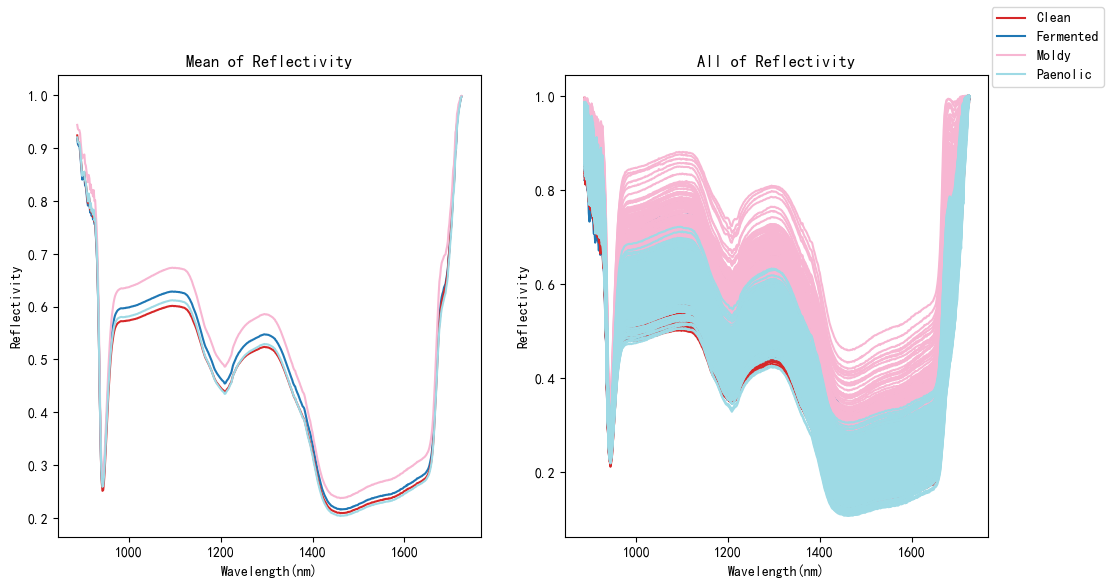

In [19]:
import sys

# 使用相对路径添加（..表示上一级目录）
sys.path.insert(0, "../SpectralAnalysis")

import matplotlib.pyplot as plt
import numpy as np
from SpectrumAnalyse import plot_duplicate_data_both
from SpectrumAnalyse import split_data

category, split_datas = split_data(labels_name, spectrum_data)
plot_duplicate_data_both(category, split_datas, wavelengths)